<a href="https://colab.research.google.com/github/rko7/Kaggle_ML-Project/blob/main/Machine_Learning_Project_Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns # data visualization library (useful for plotting several kinds of graphs)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [8]:
# load the dataset to pandas Dataframe
df = pd.read_csv('/content/loan_data.csv')

# New Section

In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
# Printing the first 5 rows of the dataframe
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Column Explanation**<br>
Loan ID: Each row represents different applicant.<br>
Gender: Gender of the applicant.<br>
Married: Marital status of the applicant.<br>
Dependents: The number of people dependent on the applicant in the family.<br>
Education: Education details if the applicant is graduated or not.<br>
Self_Employed: If the applicant is self-employed or not.<br>
ApplicantIncome: Income of the applicant.<br>
CoapplicantIncome: Income of someone who applies for a loan along with the main applicant, such as a spouse.<br>
LoanAmount: Loan amount. NaN represents missing values.<br>
Loan_Amount_Term: Duration for which they are applying the loan.<br>
Credit_History: Same as credit score. 1 indicates good credit and likely loan approval, while 0 indicates poor credit and possible loan rejection. <br>
Property_Area: the type of area where the property is located, such as urban, rural, or semi-urban<br>
Loan_Status: loan approval status

In [11]:
# number of rows and columns
df.shape

(614, 13)

In [12]:
# statistical measures
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
# number of missing values in each column
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
# drop all the missing values
df = df.dropna()

In [15]:
# check if all the missing values in each column have been dropped
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
# label encoding - convert alphabetical values to numerical values to make processing easier
df.replace({"Loan_Status":{'N': 0,'Y': 1}}, inplace = True)

<ipython-input-16-269a6fc4cb21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({"Loan_Status":{'N': 0,'Y': 1}}, inplace = True)


In [17]:
# check if the data has changed correctly
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [18]:
# Dependents column values
df['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [19]:
# replace the value of '3+' to '4'(which is the particular value)
df = df.replace(to_replace = '3+', value = 4)

In [20]:
# check if the data has changed correctly
df['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

Data Visualization

<Axes: xlabel='Education', ylabel='count'>

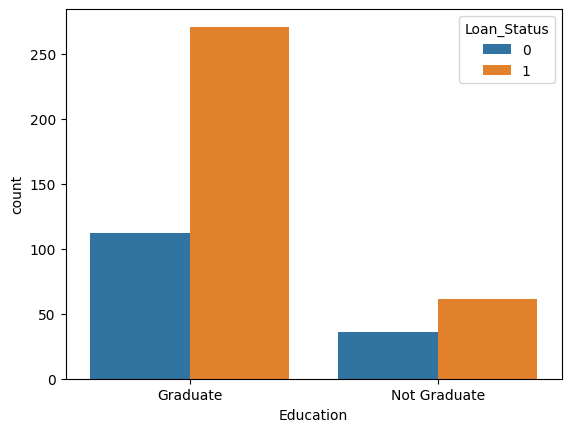

In [21]:
# Loan approval status by Education
sns.countplot(x='Education', hue='Loan_Status', data=df)

<Axes: xlabel='Married', ylabel='count'>

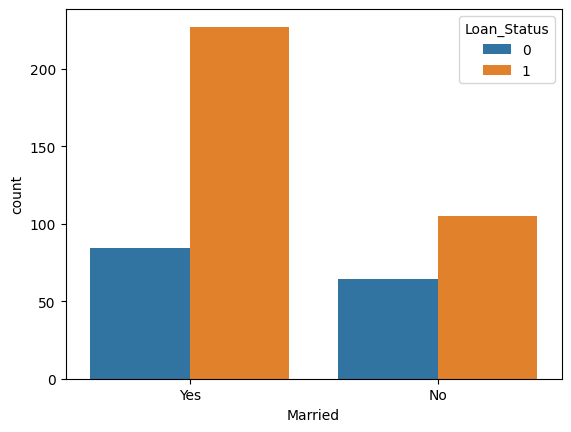

In [22]:
# Loan approval status by Marital status
sns.countplot(x='Married', hue='Loan_Status', data=df)

<Axes: xlabel='Gender', ylabel='count'>

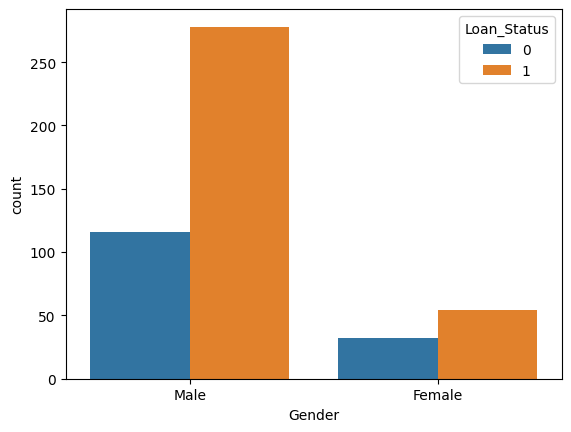

In [23]:
# Loan approval status by Gender
sns.countplot(x = 'Gender', hue = 'Loan_Status', data = df)

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

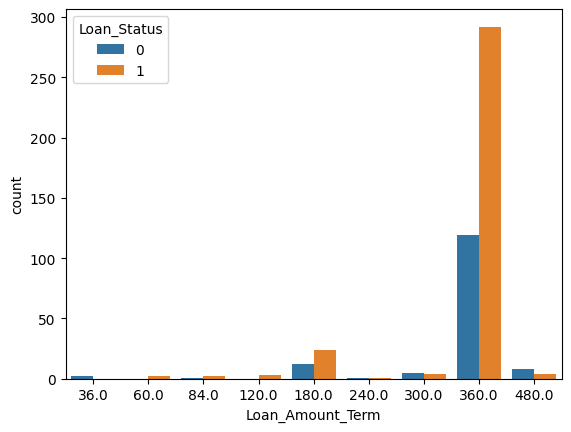

In [24]:
# Loan approval status by Loan Amount Term
sns.countplot(x = 'Loan_Amount_Term', hue = 'Loan_Status', data = df)

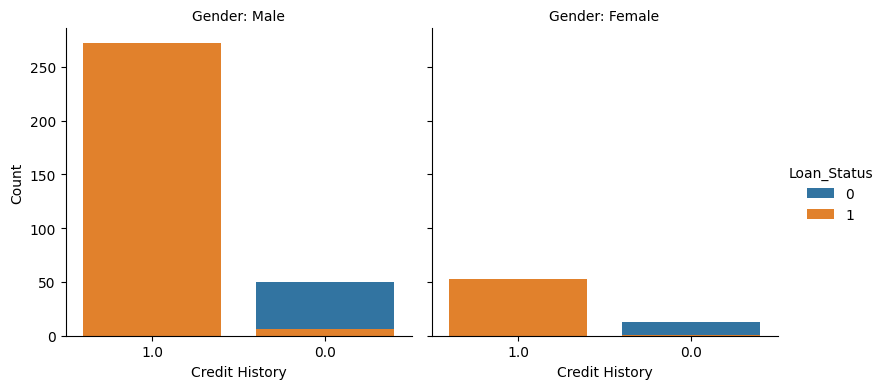

In [25]:
# Loan approval status by Credit History and Gender
g = sns.FacetGrid(df, col="Gender", hue="Loan_Status", height=4, aspect=1)
g.map(sns.countplot, "Credit_History", order=df["Credit_History"].unique())
g.add_legend()
g.set_axis_labels("Credit History", "Count")
g.set_titles("Gender: {col_name}")
plt.show()

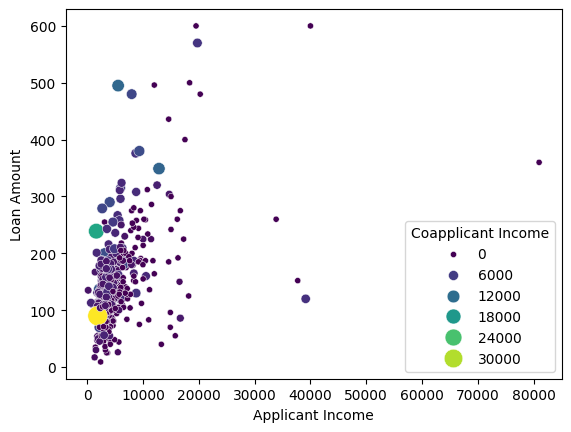

In [26]:
# relationship of ApplicantIncome, CoapplicantIncome, and LoanAmount
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', size='CoapplicantIncome', hue='CoapplicantIncome', sizes=(20, 200), data=df, palette='viridis')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.legend(title='Coapplicant Income')
plt.show()

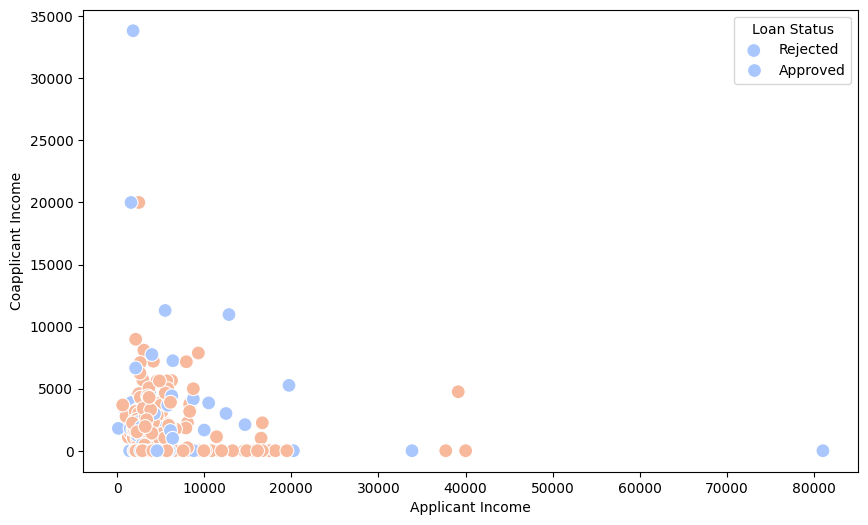

In [27]:
# relationship between ApplicantIncome, CoapplicantIncome, and Loan Status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ApplicantIncome', y='CoapplicantIncome', hue='Loan_Status', palette='coolwarm', s=100)
plt.xlabel('Applicant Income')
plt.ylabel('Coapplicant Income')
plt.legend(title='Loan Status', labels=['Rejected', 'Approved'])
plt.show()

In [28]:
# convert all alphabetical values in columns to numerical values
df.replace({'Married': {'No': 0, 'Yes': 1}, 'Gender':{'Male': 1, 'Female': 0}, 'Self_Employed': {'No': 0, 'Yes': 1},
            'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2}, 'Education': {'Graduate': 1, 'Not Graduate': 0}}, inplace = True)

In [29]:
# check if the data has changed correctly
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [30]:
# separate the data and corresponding label & Drop the unnecessary columns (Loan ID, Loan Status)
X = df.drop(columns = ['Loan_ID', 'Loan_Status'], axis = 1)
Y = df['Loan_Status']

In [31]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

<ipython-input-32-a0eaf5d1867d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Dependents', y='Loan_Status', hue='Gender', data=df, ci=None)


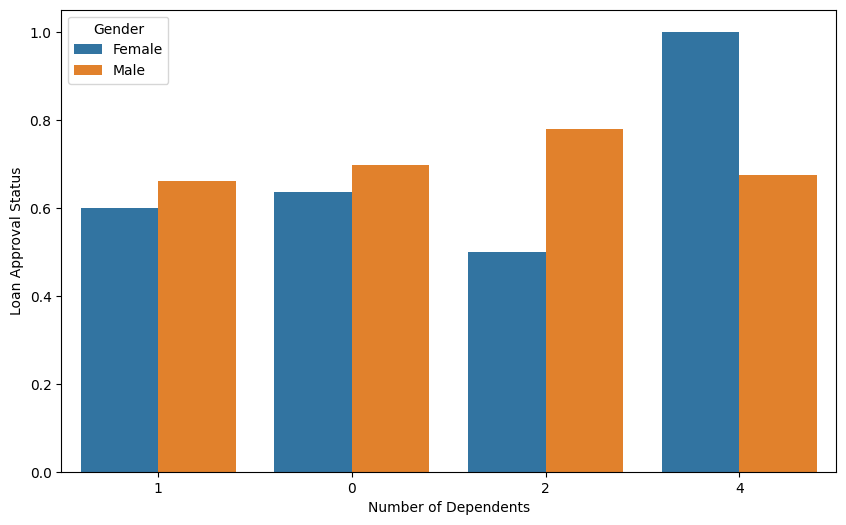

In [32]:
# relationship between Loan Status, Dependents, and Gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Dependents', y='Loan_Status', hue='Gender', data=df, ci=None)
plt.xlabel('Number of Dependents')
plt.ylabel('Loan Approval Status')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

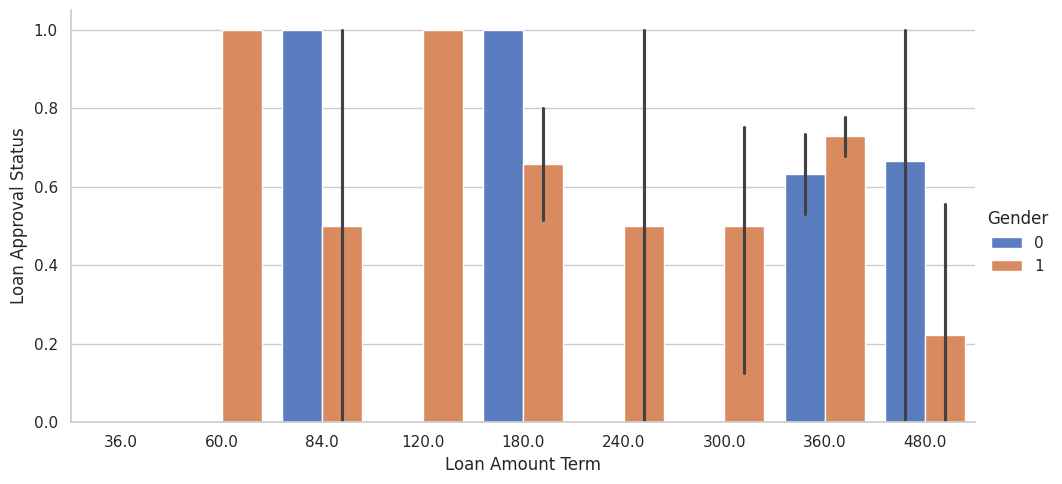

In [33]:
# relationship of Loan Approval Status and Loan Amount Term by Gender
sns.set(style="whitegrid")
g = sns.catplot(
    x="Loan_Amount_Term",
    y="Loan_Status",
    hue="Gender",
    kind="bar",
    data=df,
    height=5,
    aspect=2,
    palette="muted"
)
g.set_axis_labels("Loan Amount Term", "Loan Approval Status")
plt.show()

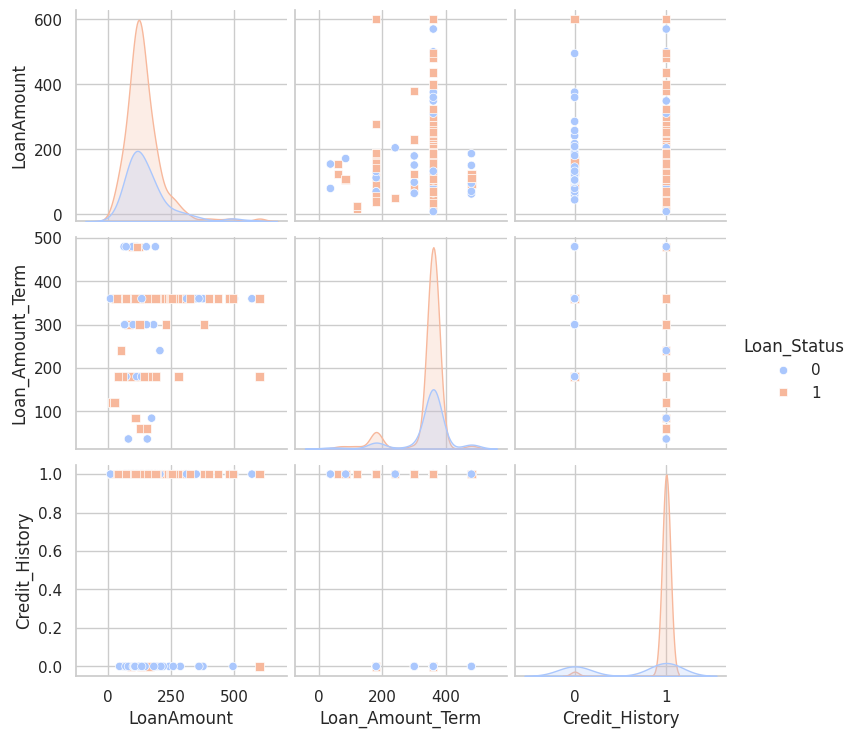

In [34]:
df_selected = df[['Loan_Status', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
sns.pairplot(df_selected, hue='Loan_Status', palette='coolwarm', markers=["o", "s"])
plt.show()

Train Test Split

In [35]:
# split the data into training data and test data (X represents data, Y represents label)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state = 2)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


Training the model: <br>
Support Vector Machine Model

In [37]:
classifier = svm.SVC(kernel = 'linear')

In [38]:
#train the support Vector Macine model
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

In [39]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train) # not contain the label
training_data_accuray = accuracy_score(X_train_prediction, Y_train)

In [40]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7986111111111112


In [41]:
# accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction, Y_test)

In [42]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8333333333333334


Accuracy on training data is about 80% and accuracy on test data is around 83%. <br> Therefore, the model is not overfitted.

Making a predictive system

In [43]:
input_data = (1, 1, 0, 1, 0, 3000, 0, 150, 360, 1.0, 2)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('The person is not eligible for a loan')
else:
    print('The person is eligible for a loan')

[1]
The person is eligible for a loan


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
